Dataframe head:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    i

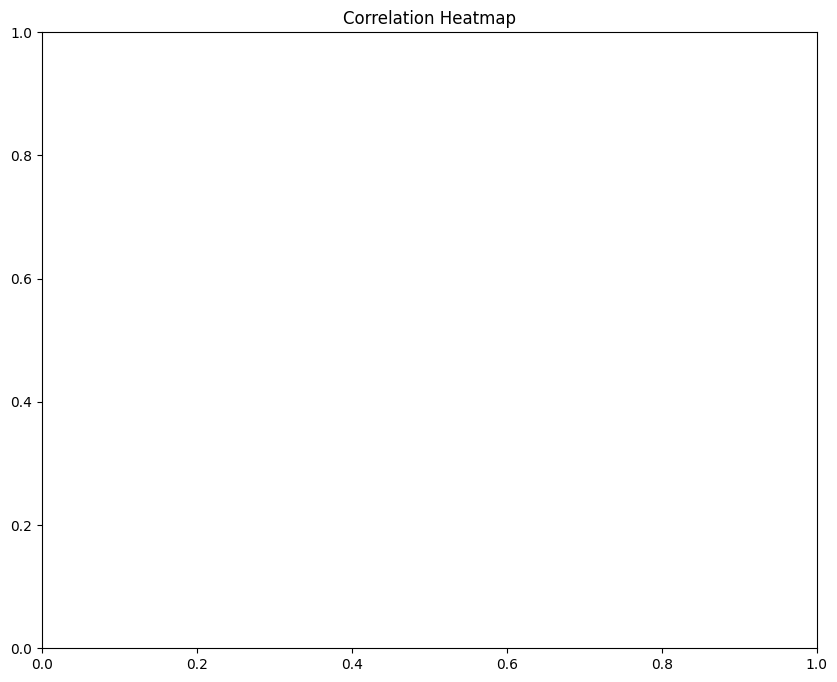

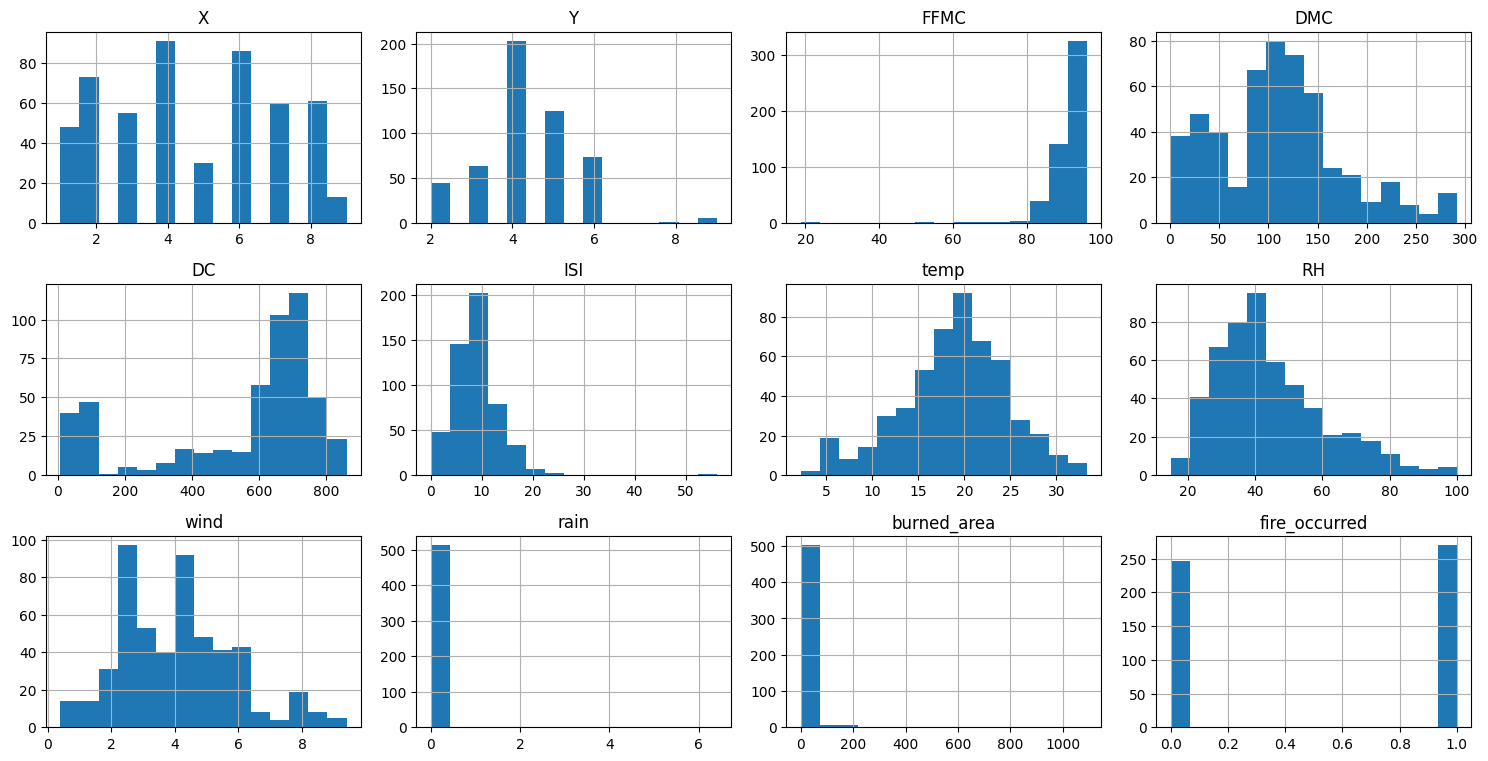

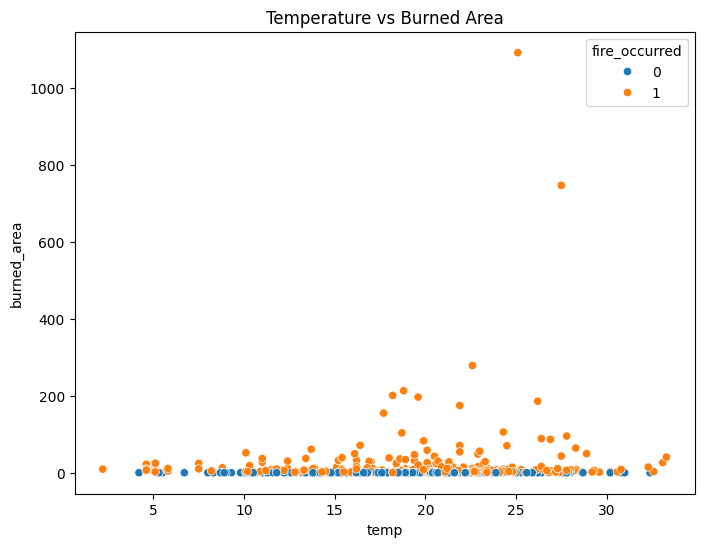

EDA preprocessing complete.


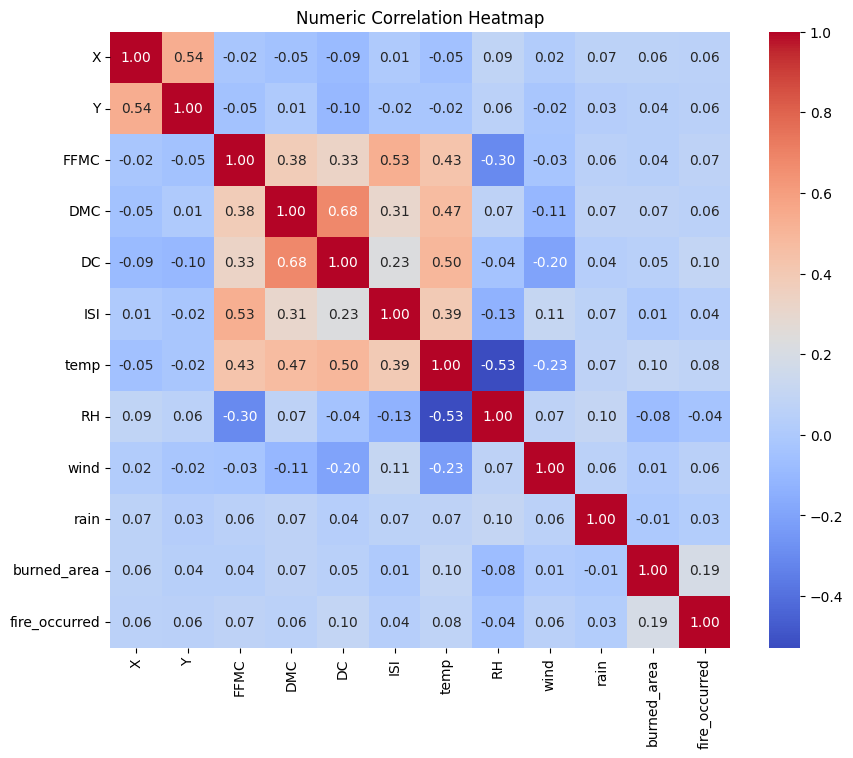

Updated correlation plot using numeric data only complete.
Data prepared for modeling with dummy variables for categorical fields.
Preprocessing complete.


In [16]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset from the zip file
# Assuming the zip has a single CSV file inside
df = pd.read_csv("/content/forestfires.csv")
df.head()



# Import necessary libraries
import pandas as pd
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns

# # Extract the zip archive and identify file inside
# zip_path = 'archive.zip'

# with zipfile.ZipFile(zip_path, 'r') as z:
#     file_list = z.namelist()
#     print('Files in archive:', file_list)
#     # Assume that the forest fires dataset is in a csv file inside the archive
#     # Let's load the first csv encountered
#     csv_files = [f for f in file_list if f.endswith('.csv')]
#     if csv_files:
#         csv_file = csv_files[0]
#         with z.open(csv_file) as f:
#             df = pd.read_csv(f)
#     else:
#         # If no csv, try reading excel file
#         xlsx_files = [f for f in file_list if f.endswith('.xlsx') or f.endswith('.xls')]
#         if xlsx_files:
#             xlsx_file = xlsx_files[0]
#             with z.open(xlsx_file) as f:
#                 df = pd.read_excel(f)
#         else:
#             raise ValueError('No csv or excel file found in the archive.')

# Show the head of the dataframe and describe basic info
print('Dataframe head:')
print(df.head())
print('\
Dataframe Info:')
print(df.info())

# Now basic EDA for forest fires dataset.
# Assuming key columns might include "temp", "humidity", "wind", "rain", burned area and perhaps a label that indicates fire occurrence.
# If such a column doesn't exist, we can create one from burned area (e.g. fire occurred if burned area >0)

if 'burned_area' not in df.columns and 'area' in df.columns:
    df.rename(columns={'area':'burned_area'}, inplace=True)

if 'burned_area' in df.columns and 'fire_occurred' not in df.columns:
    df['fire_occurred'] = df['burned_area'].apply(lambda x: 1 if x>0 else 0)

print('\
Summary statistics:')
print(df.describe())

# Correlation matrix between weather features and burned_area/fire_occurred if available
plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Histograms for key variables
numeric_cols = df.select_dtypes(include='number').columns.tolist()

df[numeric_cols].hist(bins=15, figsize=(15,10), layout=(4,4))
plt.tight_layout()
plt.show()

# Scatter plot for temperature vs burned_area if the column exists
if 'temp' in df.columns and 'burned_area' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='temp', y='burned_area', hue='fire_occurred')
    plt.title('Temperature vs Burned Area')
    plt.show()

print('EDA preprocessing complete.')


# Let's update the correlation heatmap code to only include numeric columns in the correlation.

numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numeric Correlation Heatmap')
plt.show()

print('Updated correlation plot using numeric data only complete.')

# We can also convert categorical columns like 'month' and 'day' into dummy variables if needed for predictive modeling
if 'month' in df.columns and 'day' in df.columns:
    df_dummies = pd.get_dummies(df[['month', 'day']], drop_first=True)
    df_model = pd.concat([df, df_dummies], axis=1)
    print('Data prepared for modeling with dummy variables for categorical fields.')
else:
    df_model = df.copy()
    print('No categorical month/day columns identified for dummy conversion.')

print('Preprocessing complete.')
